## Import Package & Basic Setting

In [ ]:
!pip install miditoolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import sys
import gdown
import zipfile
from glob import glob
import tensorflow as tf

In [ ]:
!rm -r sample_data

rm: cannot remove 'sample_data': No such file or directory


## Download File

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


### Pretrained Checkpoint

In [ ]:
if not os.path.isdir("checkpoint"):
    os.mkdir("checkpoint")

In [ ]:
# url = 'https://drive.google.com/uc?export=download&id=1vSivxxVsy9kyUFCaWiz8YS56SGIJ8c9C'
# output = 'checkpoint/REMI-tempo-checkpoint.zip'
# gdown.download(url, output, quiet=False)

with zipfile.ZipFile("/gdrive/MyDrive/Projects/Train-REMI-Music-Transformer-on-Our-Own-Dataset/checkpoint/REMI-tempo-checkpoint.zip", 'r') as zip_ref:
    zip_ref.extractall("checkpoint/")

# !rm checkpoint/REMI-tempo-checkpoint.zip

In [ ]:
# url = 'https://drive.google.com/uc?export=download&id=1ApBzsf51_ruV-CRR9bVlNvpO3g-QqmlJ'
# output = 'checkpoint/REMI-jaychou-checkpoint.zip'
# gdown.download(url, output, quiet=False)

with zipfile.ZipFile("/gdrive/MyDrive/Projects/Train-REMI-Music-Transformer-on-Our-Own-Dataset/checkpoint/REMI-jay-chou-checkpoint.zip", 'r') as zip_ref:
    zip_ref.extractall("checkpoint/REMI-jaychou-checkpoint")

# !rm checkpoint/REMI-jaychou-checkpoint.zip

In [ ]:
# url = 'https://drive.google.com/uc?export=download&id=1ApBzsf51_ruV-CRR9bVlNvpO3g-QqmlJ'
# output = 'checkpoint/REMI-jaychou-checkpoint.zip'
# gdown.download(url, output, quiet=False)

with zipfile.ZipFile("/gdrive/MyDrive/Projects/Train-REMI-Music-Transformer-on-Our-Own-Dataset/checkpoint/REMI-tempo-chord-checkpoint.zip", 'r') as zip_ref:
    zip_ref.extractall("checkpoint/")

# !rm checkpoint/REMI-jaychou-checkpoint.zip

### Code

In [ ]:
if not os.path.isdir("code"):
    os.mkdir("code")

In [ ]:
!mkdir code
!cp -r /gdrive/MyDrive/Projects/Train-REMI-Music-Transformer-on-Our-Own-Dataset/code/remi-master/* /content/code/
!rm -r code/result
!touch code/__init__.py

mkdir: cannot create directory ‘code’: File exists


### Dataset

In [ ]:
if not os.path.isdir("dataset"):
    os.mkdir("dataset")

In [ ]:
with zipfile.ZipFile("/gdrive/MyDrive/Projects/Train-REMI-Music-Transformer-on-Our-Own-Dataset/dataset/matser-data.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")

In [ ]:
with zipfile.ZipFile("/gdrive/MyDrive/Projects/Train-REMI-Music-Transformer-on-Our-Own-Dataset/dataset/Jay02.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset/Jolin-data")

## Model Inference

### Build Model

In [ ]:
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
tf.compat.v1.disable_eager_execution()
sys.path.append("code")
from code.model import PopMusicTransformer


model = PopMusicTransformer(
    checkpoint='/content/checkpoint/REMI-jolin-chord-checkpoint',
    #checkpoint='/content/checkpoint/REMI-jay-chou-chord-10-checkpoint/content/checkpoint/REMI-jaychou-chord-checkpoint',
    is_training=False)

### Generate Music

In [ ]:
if not os.path.isdir("result"):
    os.mkdir("result")

#### Scratch

In [ ]:
model.generate(
    n_target_bar=32,
    temperature=1.5,
    topk=5,
    output_path='./result/scratch01.midi',
    prompt=None)

In [ ]:
model.generate(
    n_target_bar=32,
    temperature=1.5,
    topk=5,
    output_path='./result/scratch02.midi',
    prompt=None)

In [ ]:
model.generate(
    n_target_bar=32,
    temperature=1.5,
    topk=5,
    output_path='./result/scratch03.midi',
    prompt=None)

In [ ]:
model.generate(
    n_target_bar=32,
    temperature=1.5,
    topk=5,
    output_path='./result/scratch04.midi',
    prompt=None)

In [ ]:
model.generate(
    n_target_bar=32,
    temperature=1.5,
    topk=5,
    output_path='./result/scratch05.midi',
    prompt=None)

In [ ]:
model.generate(
    n_target_bar=16,
    temperature=1.5,
    topk=5,
    output_path='./result/scratch06.midi',
    prompt=None)

In [ ]:
model.generate(
    n_target_bar=16,
    temperature=1.5,
    topk=5,
    output_path='./result/scratch07.midi',
    prompt=None)

In [ ]:
model.generate(
    n_target_bar=16,
    temperature=1.5,
    topk=5,
    output_path='./result/scratch08.midi',
    prompt=None)

In [ ]:
model.generate(
    n_target_bar=16,
    temperature=1.5,
    topk=5,
    output_path='./result/scratch09.midi',
    prompt=None)

In [ ]:
model.generate(
    n_target_bar=16,
    temperature=1.5,
    topk=5,
    output_path='./result/scratch10.midi',
    prompt=None)

##### Continuation

In [ ]:
#model.generate(
#    n_target_bar=16,
#    temperature=1.2,
#    topk=5,
#    output_path='./result/chord_continuation.midi',
#    prompt='/content/dataset/data/evaluation/000.midi')

## Fine-Tune Model

### Build Model

In [ ]:
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
tf.compat.v1.disable_eager_execution()
sys.path.append("code")
from code.model import PopMusicTransformer

model = PopMusicTransformer(
    # checkpoint='/content/checkpoint/REMI-tempo-checkpoint',
    checkpoint='/content/checkpoint/REMI-tempo-chord-checkpoint',
    is_training=True)

Instructions for updating:
Please use tf.global_variables instead.
INFO:tensorflow:Restoring parameters from /content/checkpoint/REMI-tempo-chord-checkpoint/model


In [ ]:
model.all_vars

[<tf.Variable 'global_step:0' shape=() dtype=int64>,
 <tf.Variable 'transformer/r_w_bias:0' shape=(8, 64) dtype=float32>,
 <tf.Variable 'transformer/r_r_bias:0' shape=(8, 64) dtype=float32>,
 <tf.Variable 'transformer/normal_embed/lookup_table:0' shape=(308, 512) dtype=float32>,
 <tf.Variable 'transformer/layer_0/rel_attn/qkv/kernel:0' shape=(512, 1536) dtype=float32>,
 <tf.Variable 'transformer/layer_0/rel_attn/r/kernel:0' shape=(512, 512) dtype=float32>,
 <tf.Variable 'transformer/layer_0/rel_attn/o/kernel:0' shape=(512, 512) dtype=float32>,
 <tf.Variable 'transformer/layer_0/rel_attn/layer_normalization/gamma:0' shape=(512,) dtype=float32>,
 <tf.Variable 'transformer/layer_0/rel_attn/layer_normalization/beta:0' shape=(512,) dtype=float32>,
 <tf.Variable 'transformer/layer_0/ff/layer_1/kernel:0' shape=(512, 2048) dtype=float32>,
 <tf.Variable 'transformer/layer_0/ff/layer_1/bias:0' shape=(2048,) dtype=float32>,
 <tf.Variable 'transformer/layer_0/ff/layer_2/kernel:0' shape=(2048, 512)

In [ ]:
model.all_vars_train

[<tf.Variable 'transformer/r_w_bias:0' shape=(8, 64) dtype=float32>,
 <tf.Variable 'transformer/r_r_bias:0' shape=(8, 64) dtype=float32>,
 <tf.Variable 'transformer/normal_embed/lookup_table:0' shape=(308, 512) dtype=float32>,
 <tf.Variable 'transformer/layer_0/rel_attn/qkv/kernel:0' shape=(512, 1536) dtype=float32>,
 <tf.Variable 'transformer/layer_0/rel_attn/r/kernel:0' shape=(512, 512) dtype=float32>,
 <tf.Variable 'transformer/layer_0/rel_attn/o/kernel:0' shape=(512, 512) dtype=float32>,
 <tf.Variable 'transformer/layer_0/rel_attn/layer_normalization/gamma:0' shape=(512,) dtype=float32>,
 <tf.Variable 'transformer/layer_0/rel_attn/layer_normalization/beta:0' shape=(512,) dtype=float32>,
 <tf.Variable 'transformer/layer_0/ff/layer_1/kernel:0' shape=(512, 2048) dtype=float32>,
 <tf.Variable 'transformer/layer_0/ff/layer_1/bias:0' shape=(2048,) dtype=float32>,
 <tf.Variable 'transformer/layer_0/ff/layer_2/kernel:0' shape=(2048, 512) dtype=float32>,
 <tf.Variable 'transformer/layer_0/f

In [ ]:
import numpy as np

In [ ]:
num_params = 0

for param in model.all_vars_train:
    shape = param.shape.as_list()
    num_params += np.prod(shape)

In [ ]:
num_params

41108788

### Specify Own Dataset

In [ ]:
midi_paths = glob('/content/dataset/Jolin-data/*.mid')
print("total: ", len(midi_paths))

total:  10


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
training_data = model.prepare_data(midi_paths=midi_paths)

something is wrong! Tempo Value_18
something is wrong! Tempo Value_18
something is wrong! Tempo Value_18
something is wrong! Tempo Value_18
something is wrong! Note On_0
something is wrong! Note On_0
something is wrong! Note On_0
something is wrong! Note On_0


In [ ]:
training_data.shape

(21, 5, 2, 512)

### Add Unknown Event to `dictionary.pkl`

In [ ]:
import pickle
with open('/content/checkpoint/REMI-tempo-chord-checkpoint/dictionary.pkl', 'rb') as f:
    data = pickle.load(f)

In [ ]:
data[1][308] = 'Note On_0'
data[0]['Note On_0'] = 308

In [ ]:
with open('/content/checkpoint/REMI-tempo-chord-checkpoint/dictionary.pkl', 'wb') as f:
    pickle.dump(data, f)

### Start Finetune

In [ ]:
output_checkpoint_folder = 'checkpoint/REMI-jolin-chord-checkpoint' # your decision
if not os.path.exists(output_checkpoint_folder):
    os.mkdir(output_checkpoint_folder)

In [ ]:
batch_loss_history = model.finetune(
    training_data=training_data,
    output_checkpoint_folder=output_checkpoint_folder
)

>>> Epoch: 0, Step: 51240, Loss: 6.75775, Time: 7.17
>>> Epoch: 0, Step: 51241, Loss: 3.19768, Time: 7.69
>>> Epoch: 0, Step: 51242, Loss: 2.97242, Time: 8.20
>>> Epoch: 0, Step: 51243, Loss: 3.30167, Time: 8.72
>>> Epoch: 0, Step: 51244, Loss: 6.52693, Time: 9.24
>>> Epoch: 0, Step: 51245, Loss: 4.19906, Time: 9.79
>>> Epoch: 0, Step: 51246, Loss: 3.16088, Time: 10.31
>>> Epoch: 0, Step: 51247, Loss: 2.64773, Time: 10.83
>>> Epoch: 0, Step: 51248, Loss: 2.06261, Time: 11.34
>>> Epoch: 0, Step: 51249, Loss: 2.10672, Time: 11.86
>>> Epoch: 0, Step: 51250, Loss: 3.75871, Time: 12.40
>>> Epoch: 0, Step: 51251, Loss: 3.44898, Time: 12.91
>>> Epoch: 0, Step: 51252, Loss: 2.75367, Time: 13.44
>>> Epoch: 0, Step: 51253, Loss: 2.05078, Time: 13.95
>>> Epoch: 0, Step: 51254, Loss: 1.77921, Time: 14.47
>>> Epoch: 0, Step: 51255, Loss: 2.62011, Time: 15.00
>>> Epoch: 0, Step: 51256, Loss: 2.48279, Time: 15.53
>>> Epoch: 0, Step: 51257, Loss: 1.87321, Time: 16.05
>>> Epoch: 0, Step: 51258, Loss: 1

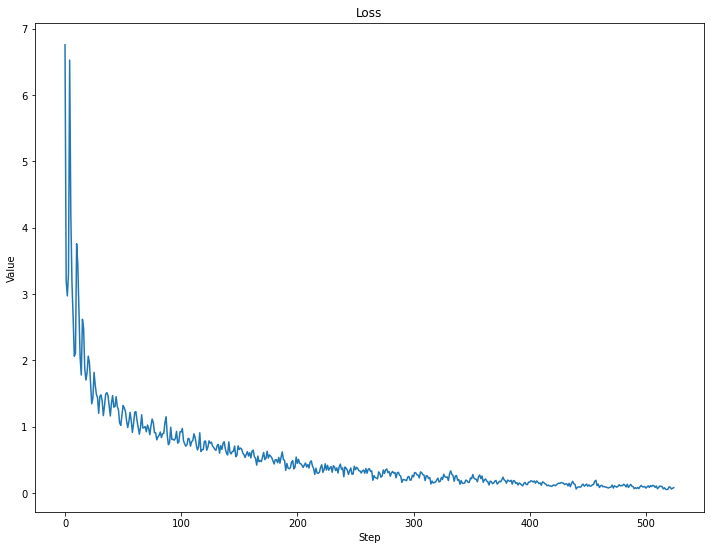

In [ ]:
# display training result
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.title("Loss")
plt.xlabel("Step")
plt.ylabel("Value")
plt.plot(batch_loss_history[:])

In [ ]:
import pandas as pd
df = {'loss': batch_loss_history}
df = pd.DataFrame(df) 
df.to_csv('/gdrive/MyDrive/Projects/Train-REMI-Music-Transformer-on-Our-Own-Dataset/log/loss.csv')

OSError: ignored

### Format Chord Checkpoint

In [ ]:
# your chord checkpoint path
root = '/content/checkpoint/REMI-jolin-chord-checkpoint'

# remove redundant file
idx = '016'
path = f'{root}/model-{str(idx)}-*'
!rm $path

In [ ]:
# rename file
idx = '012'

path = f'{root}/model-{str(idx)}-nan.data-*'
new_path = f'{root}/model.data-00000-of-00001'
!mv $path $new_path

path = f'{root}/model-{str(idx)}-nan.index'
new_path = f'{root}/model.index'
!mv $path $new_path

path = f'{root}/model-{str(idx)}-nan.meta'
new_path = f'{root}/model.meta'
!mv $path $new_path

mv: cannot stat '/content/checkpoint/REMI-jolin-chord-checkpoint/model-012-nan.data-*': No such file or directory
mv: cannot stat '/content/checkpoint/REMI-jolin-chord-checkpoint/model-012-nan.index': No such file or directory
mv: cannot stat '/content/checkpoint/REMI-jolin-chord-checkpoint/model-012-nan.meta': No such file or directory


In [ ]:
# copy dictionary.pkl
path1 = '/content/checkpoint/REMI-tempo-chord-checkpoint/dictionary.pkl'
path2 = '/content/checkpoint/REMI-jolin-chord-checkpoint/dictionary.pkl'
!cp $path1 $path2

## Debug

In [ ]:
!cp /content/code/model.py /gdrive/MyDrive/Projects/Train-REMI-Music-Transformer-on-Our-Own-Dataset/code/remi-master/model.py